In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-prediction/infolimpioavanzadoTarget.csv


In [75]:
import pandas as pd

In [76]:
data=pd.read_csv('/kaggle/input/stock-market-prediction/infolimpioavanzadoTarget.csv')

In [77]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [78]:
data.shape

(7781, 1285)

In [79]:
data.keys()

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

In [80]:
data.info

<bound method DataFrame.info of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  ...    high-15    

In [81]:
data.describe

<bound method NDFrame.describe of             date       open       high        low      close   adjclose  \
0     2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000   
1     2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000   
2     2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001   
3     2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000   
4     2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000   
...          ...        ...        ...        ...        ...        ...   
7776  2022-12-23  23.250000  23.540001  23.250000  23.290001  22.699928   
7777  2022-12-27  23.350000  23.610001  23.250000  23.350000  22.758406   
7778  2022-12-28  23.450001  23.570000  23.219999  23.350000  22.758406   
7779  2022-12-29  23.330000  23.740000  23.330000  23.610001  23.011820   
7780  2022-12-30  23.680000  23.760000  23.610001  23.610001  23.011820   

      volume ticker  RSIadjclose15  RSIvolume15  ...    high-15  

In [82]:
data.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [83]:
data['stochastic-kd-15'].dtype

dtype('float64')

In [84]:
data["tomorrow"]= data["close"].shift(-1)
data

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0,15.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0,23.350000
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0,23.610001
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0,23.610001


In [85]:
data["target"] = data["tomorrow"] > data["close"].astype(float)
data

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0,15.860000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0,23.350000,False
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0,23.610001,True
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0,23.610001,False


In [86]:
data['stochastic-kd-15'].isnull().sum()

587

In [87]:
# data['close'].isnull().sum()

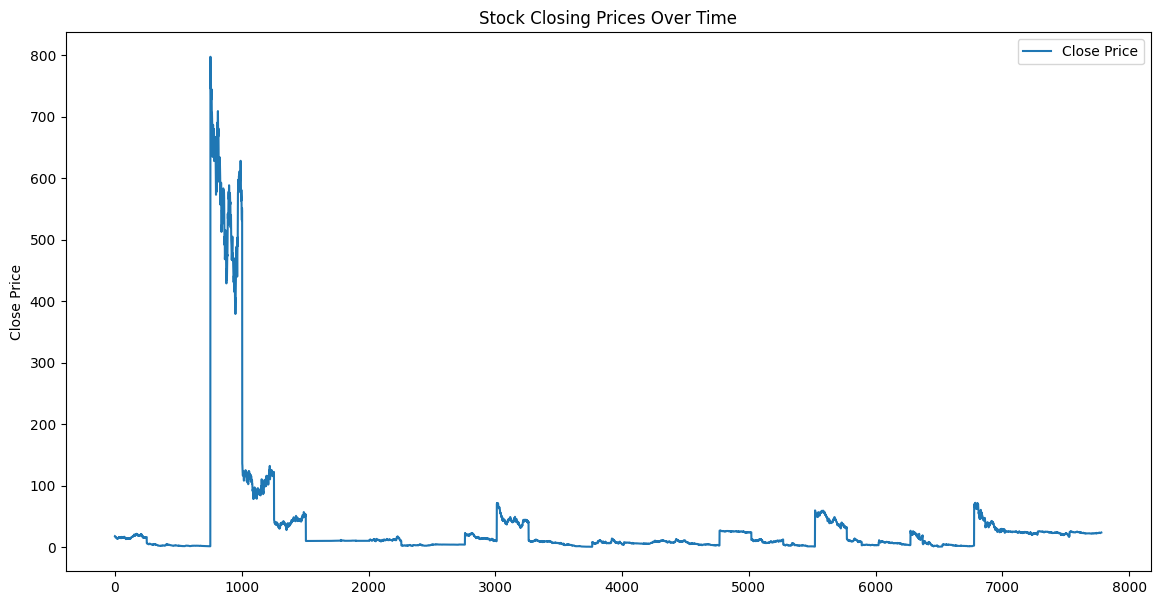

In [88]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.ylabel('Close Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()


In [89]:
#predictive modeling

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model = RandomForestClassifier(n_estimators=200, min_samples_split= 100, random_state=1)

In [92]:
train = data.iloc[:-100]
test = data.iloc[-100:]

In [93]:
#More EDA

In [94]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


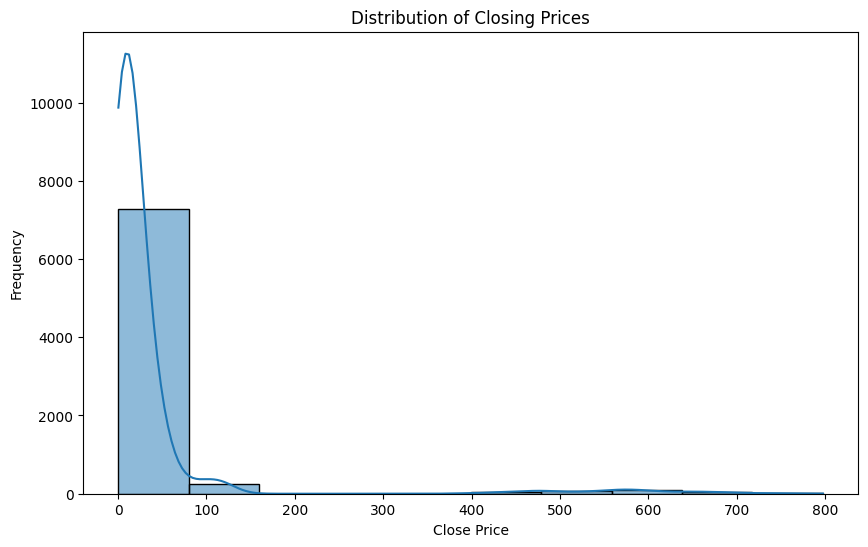

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], bins=10, kde=True)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()

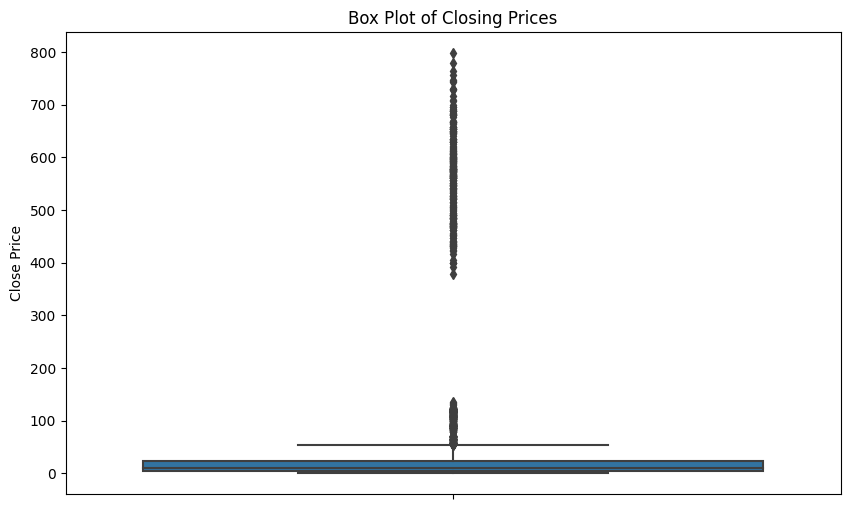

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['close'])
plt.ylabel('Close Price')
plt.title('Box Plot of Closing Prices')
plt.show()

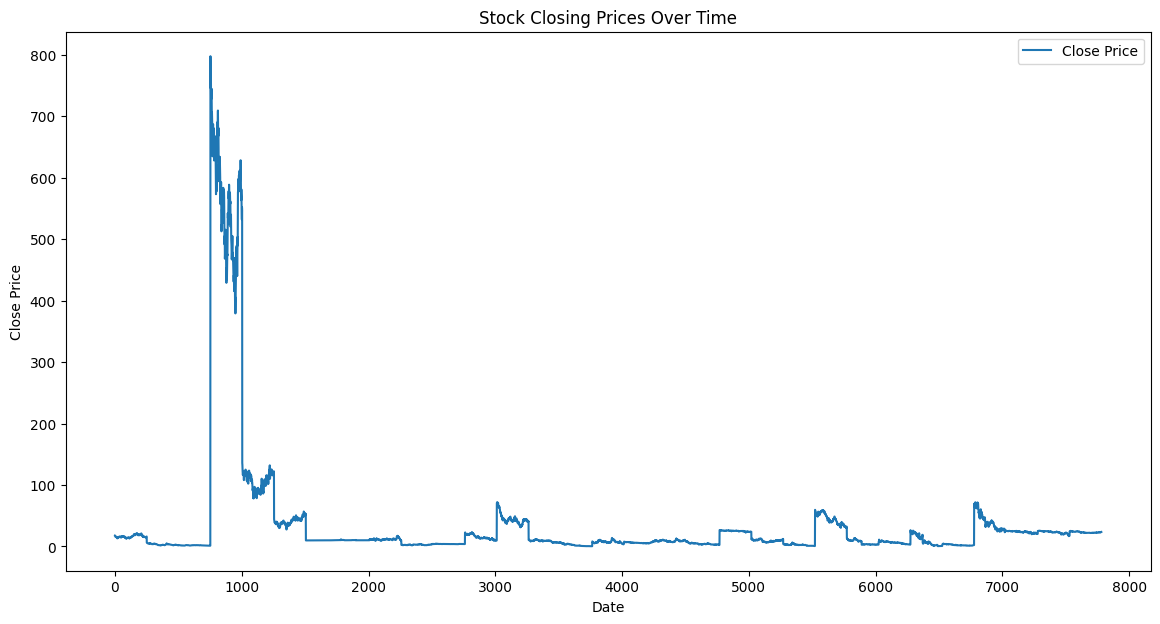

In [97]:
# Convert 'date' column to datetime format
# data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
# data.set_index('date', inplace=True)

# Plot closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(data['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Prices Over Time')
plt.legend()
plt.show()


In [ ]:
sns.pairplot(data[['open', 'high', 'low', 'close', 'volume']])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

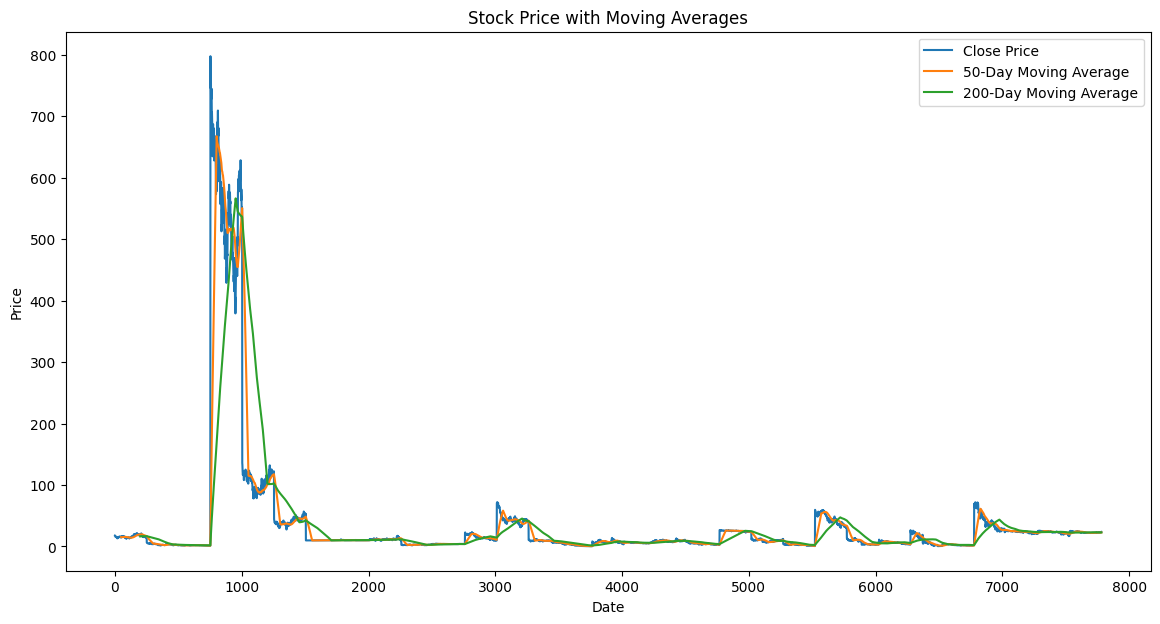

In [99]:
data['MA50'] = data['close'].rolling(window=50).mean()
data['MA200'] = data['close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['close'], label='Close Price')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average')
plt.plot(data.index, data['MA200'], label='200-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

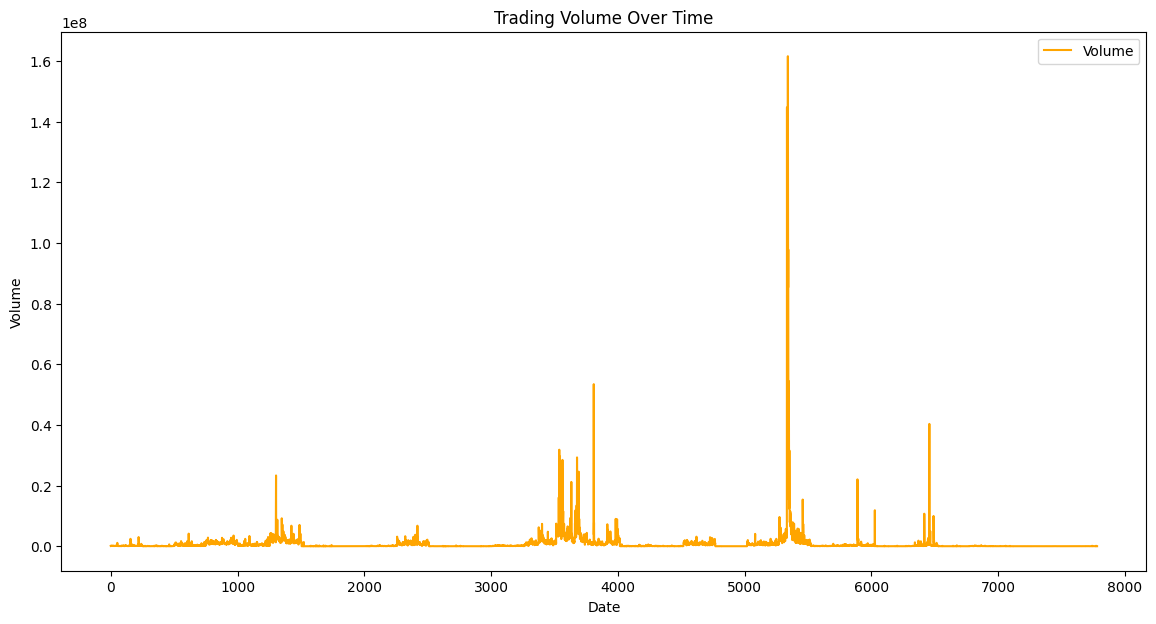

In [100]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

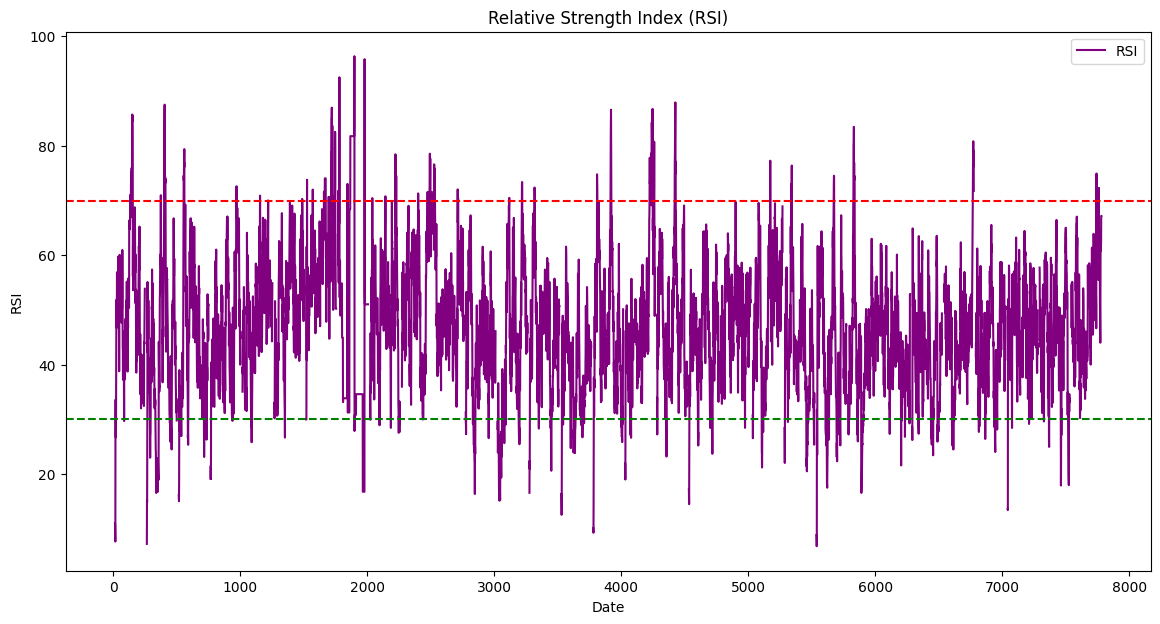

In [101]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RSIadjclose15'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

In [102]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,tomorrow,target,MA50,MA200
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,0.919758,-1.900001,-9.664295,0,17.660000,False,NaN,NaN
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,1.110440,-1.379999,-7.247895,0,16.950001,False,NaN,NaN
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,0.889560,-0.930000,-5.201344,0,16.170000,False,NaN,NaN
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,1.497843,-0.360000,-2.177856,0,15.710000,False,NaN,NaN
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,1.188956,-0.120000,-0.758054,0,15.860000,True,NaN,NaN


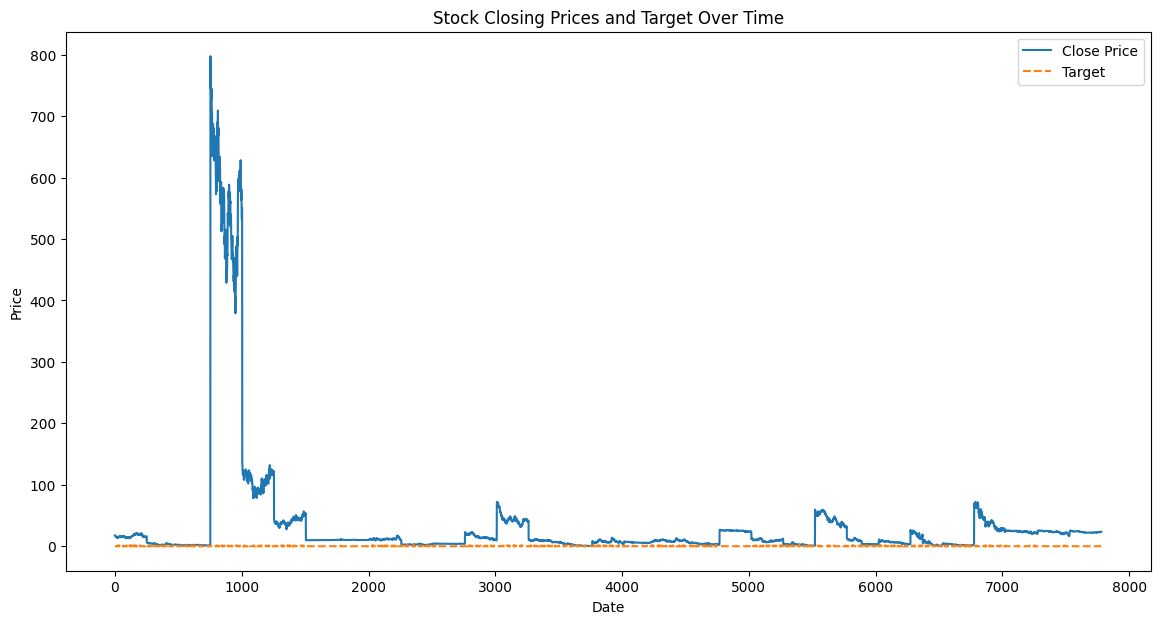

In [103]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['close'], label='Close Price')
plt.plot(data.index, data['TARGET'], label='Target', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Closing Prices and Target Over Time')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


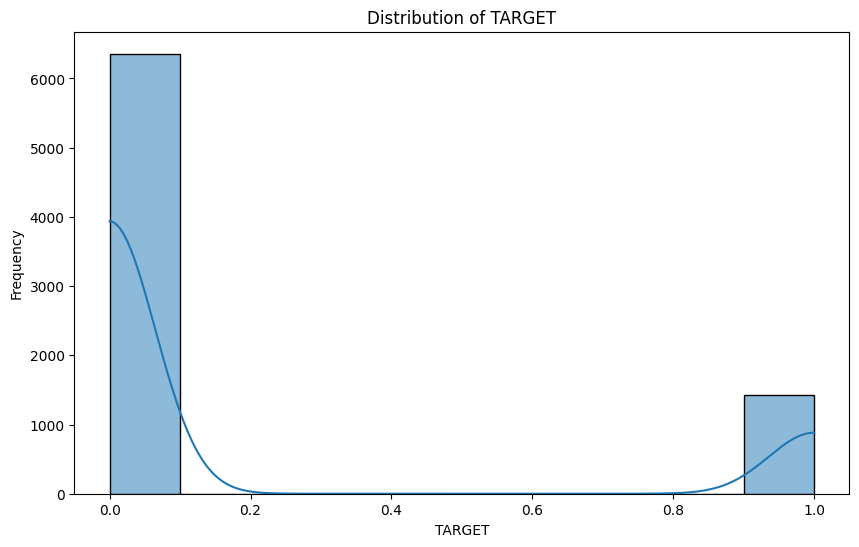

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TARGET'], bins=10, kde=True)
plt.xlabel('TARGET')
plt.ylabel('Frequency')
plt.title('Distribution of TARGET')
plt.show()

**Predictive Modeling**

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [106]:
#feature engg
features = ['open', 'high', 'low', 'volume']
target = 'close'

In [107]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
#linear regression 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print(f'Linear Regression RMSE: {mean_squared_error(y_test, lr_predictions, squared=False)}')
print(f'Linear Regression MAE: {mean_absolute_error(y_test, lr_predictions)}')

Linear Regression RMSE: 1.017374851790236
Linear Regression MAE: 0.3043256154545896


In [109]:
#decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print(f'Decision Tree RMSE: {mean_squared_error(y_test, dt_predictions, squared=False)}')
print(f'Decision Tree MAE: {mean_absolute_error(y_test, dt_predictions)}')

Decision Tree RMSE: 2.4739939737592613
Decision Tree MAE: 0.5319485548182644


In [110]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print(f'Random Forest RMSE: {mean_squared_error(y_test, rf_predictions, squared=False)}')
print(f'Random Forest MAE: {mean_absolute_error(y_test, rf_predictions)}')

Random Forest RMSE: 1.885082725829231
Random Forest MAE: 0.44335247407892825


In [111]:
#svm
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
print(f'SVR RMSE: {mean_squared_error(y_test, svr_predictions, squared=False)}')
print(f'SVR MAE: {mean_absolute_error(y_test, svr_predictions)}')

SVR RMSE: 95.31432204855642
SVR MAE: 27.935388151593123


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='b')
plt.plot(y_test.index, rf_predictions, label='Predicted Prices (RF)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [113]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Initialize the model
# svm_model = SVC(kernel='rbf', C=1, random_state=1)
# # 

In [114]:
# svm_model.fit(train[predictors], train["target"])

In [115]:
# predictors

In [116]:
# train.shape

In [117]:
# test.shape

In [118]:
# svm_predictions = svm_model.predict(test[predictors])

In [119]:
X_train = train[predictors]
y_train = train[target]
X_test = test[predictors]
y_test = test[target]

In [120]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [121]:
svr_model = SVR(C=1.0, epsilon=0.2)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)
svr_mae = mean_absolute_error(y_test, svr_predictions)
print(f'SVR RMSE: {svr_rmse}')
print(f'SVR MAE: {svr_mae}')

SVR RMSE: 0.3433078774291223
SVR MAE: 0.33008834552740185


In [122]:
svr_predictions

array([21.81108473, 21.79835979, 21.85639354, 21.99181592, 21.9268386 ,
       21.94183664, 21.99051157, 21.8625011 , 21.85060078, 21.90641522,
       21.76572144, 21.67002526, 21.6640414 , 21.61487686, 21.57319171,
       21.58380668, 21.5556911 , 21.5929718 , 21.56294049, 21.62687753,
       21.57043894, 21.75689806, 21.78200404, 21.69899768, 21.9255719 ,
       22.0086227 , 22.19049377, 21.92795013, 21.44134763, 21.86882825,
       21.88024899, 21.76371751, 21.6637672 , 21.59995331, 21.68377235,
       21.75067053, 21.88878279, 21.81720745, 22.05035312, 22.08816947,
       22.03991119, 21.87902662, 21.80267609, 21.82052023, 21.79818712,
       22.01159282, 22.21328254, 22.25799197, 22.21151914, 22.20106103,
       22.14139328, 22.0804023 , 22.15647718, 22.01156199, 22.03174644,
       21.99790835, 21.99879403, 21.84723714, 21.81946489, 21.71399939,
       21.95846993, 22.57789465, 22.44397698, 22.27100802, 22.35226612,
       22.46470927, 22.41070624, 22.186098  , 22.44037819, 22.37

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [124]:
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Decision Tree MAE: {dt_mae}')

Decision Tree RMSE: 0.017719685582453334
Decision Tree MAE: 0.008969898223877521


In [125]:
dt_predictions

array([22.11000061, 22.15999985, 22.28499985, 22.26000023, 22.30999947,
       22.21500015, 22.31999969, 22.20000076, 22.29000092, 22.22999954,
       22.        , 21.98999977, 22.04999924, 21.95000076, 21.95000076,
       21.95000076, 22.01000023, 21.95000076, 21.95000076, 22.        ,
       21.95000076, 22.17000008, 22.05999947, 22.04999924, 22.25      ,
       22.39999962, 22.18000031, 22.30999947, 22.26000023, 22.26000023,
       22.26000023, 22.01000023, 22.01000023, 22.01000023, 22.01000023,
       22.13999939, 22.18000031, 22.20000076, 22.5       , 22.5       ,
       22.35000038, 22.14999962, 22.14999962, 22.20000076, 22.18000031,
       22.5       , 22.5       , 22.51399994, 22.51399994, 22.47999954,
       22.5       , 22.43000031, 22.47999954, 22.35000038, 22.39999962,
       22.35000038, 22.39999962, 22.14999962, 22.07999992, 22.        ,
       22.35000038, 23.04999924, 22.57999992, 22.56999969, 22.62000084,
       22.73999977, 22.57999992, 22.5       , 22.61000061, 22.69

In [126]:
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=100, random_state=1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest MAE: {rf_mae}')

Random Forest RMSE: 0.10042998704538753
Random Forest MAE: 0.08546213066642813


In [127]:
rf_predictions

array([22.19944391, 22.19944391, 22.20631718, 22.20631718, 22.21294108,
       22.20272244, 22.21294108, 22.20272244, 22.20631718, 22.20631718,
       22.1810398 , 22.1810398 , 22.19944391, 22.13974635, 22.13974635,
       21.96662655, 22.1810398 , 22.0562333 , 22.13974635, 22.1810398 ,
       22.13974635, 22.19944391, 22.19944391, 22.19944391, 22.20631718,
       22.27255393, 22.20272244, 22.21294108, 22.20631718, 22.20631718,
       22.20631718, 22.1810398 , 22.1810398 , 22.1810398 , 22.1810398 ,
       22.19944391, 22.20272244, 22.20272244, 22.39370924, 22.39370924,
       22.23294262, 22.19944391, 22.19944391, 22.20272244, 22.20272244,
       22.39370924, 22.39370924, 22.56358841, 22.45258947, 22.39026227,
       22.45258947, 22.31660532, 22.39026227, 22.2515126 , 22.27255393,
       22.22309649, 22.27255393, 22.19944391, 22.19944391, 22.1810398 ,
       22.22961096, 22.93523418, 22.63251369, 22.45258947, 22.71694783,
       22.77902186, 22.63251369, 22.56358841, 22.66179285, 22.75

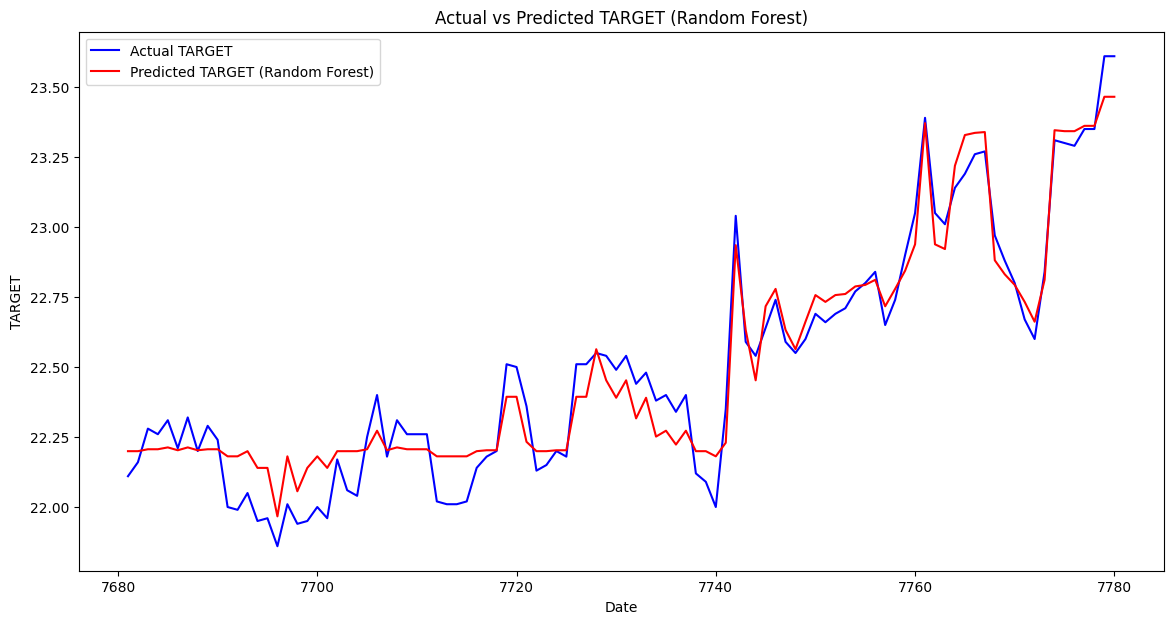

In [128]:
#using random forest
future_predictions = rf_model.predict(X_test)

# Visualizing the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual TARGET', color='b')
plt.plot(y_test.index, future_predictions, label='Predicted TARGET (Random Forest)', color='r')
plt.xlabel('Date')
plt.ylabel('TARGET')
plt.title('Actual vs Predicted TARGET (Random Forest)')
plt.legend()
plt.show()